In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load datasets
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
# Step 1: EDA
print(train_data.info())
print(train_data.describe())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

The output shows the structure and summary statistics of the Titanic dataset, providing insights for the data preprocessing and feature engineering steps. Here's how we should proceed based on this information:

### Observations:
1. **Missing Values:**
   - `Age`: 714 non-null values (177 missing values).
   - `Cabin`: Only 204 non-null values (majority missing).
   - `Embarked`: 889 non-null values (2 missing values).

2. **Categorical Data:**
   - Columns like `Name`, `Sex`, `Ticket`, `Cabin`, and `Embarked` need encoding or dropping if irrelevant.

3. **Numerical Data:**
   - Columns like `Age`, `Fare`, `SibSp`, and `Parch` need scaling or processing for missing values.

4. **Target Column:**
   - `Survived` is binary and will be the target variable vely and train a model with high accuracy. Let me know if you need further clarification or modifications!

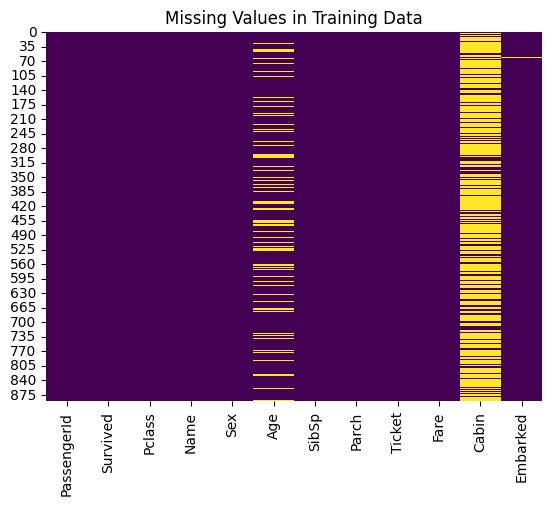

In [4]:
# Visualizing missing data
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Training Data")
plt.show()

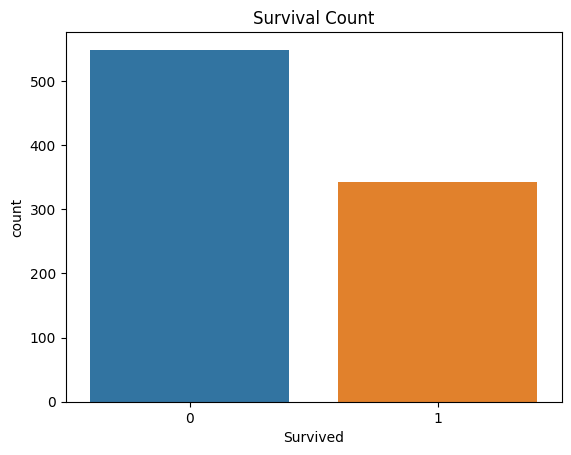

In [5]:
# Survival distribution
sns.countplot(data=train_data, x='Survived')
plt.title("Survival Count")
plt.show()

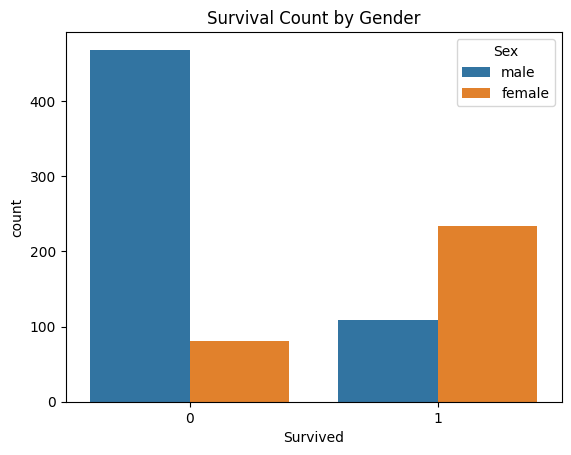

In [6]:
# Gender and survival
sns.countplot(data=train_data, x='Survived', hue='Sex')
plt.title("Survival Count by Gender")
plt.show()

In [7]:
# Step 2: Data Preprocessing
# Fill missing Age with median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [8]:
# Fill missing Embarked with mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

In [9]:
# Fill missing Fare in test data with median
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [10]:
# Drop Cabin (too many missing values) and Ticket (irrelevant) columns
train_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [11]:
# Convert categorical columns to numerical
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [12]:
# Step 3: Feature Engineering
# Create FamilySize feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [13]:
# Drop Name and PassengerId from training data
X = train_data.drop(['Name', 'PassengerId', 'Survived'], axis=1)
y = train_data['Survived']
test_ids = test_data['PassengerId']
test_data = test_data.drop(['Name', 'PassengerId'], axis=1)

In [14]:
# Step 4: Model Training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Validate the model
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.8324022346368715


In [16]:
# Step 5: Make Predictions on Test Data
test_predictions = model.predict(test_data)

In [17]:
# Step 6: Create Submission File
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': test_predictions
})

submission.to_csv("submission.csv", index=False)
print("Submission file created!")

Submission file created!
